#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [28]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [29]:
df = pd.read_csv(url)
duplikat = df.duplicated().any()
if duplikat:
    print("True")
else:
    print("False")

True


Periksa apakah ada missing values

In [30]:
df = pd.read_csv(url)
missing_values = df.isnull().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

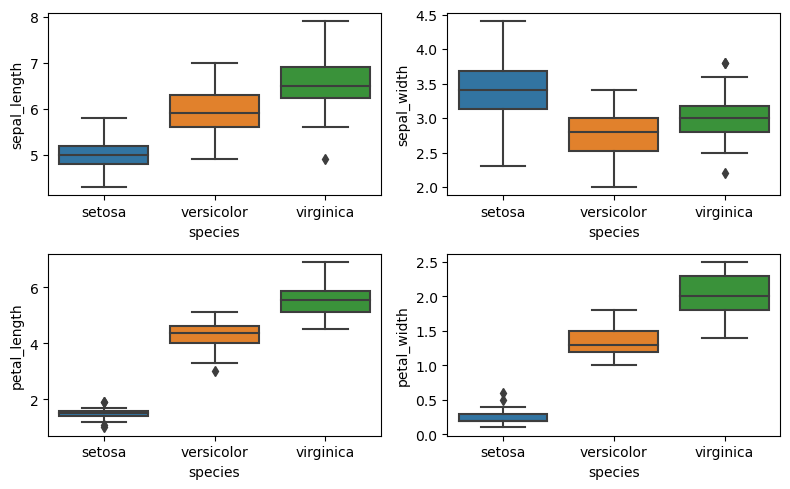

In [37]:
plt.figure(figsize=(8, 5))
plt.subplot(2,2, 1)
sns.boxplot(data=df, x="species", y="sepal_length")
plt.subplot(2,2, 2)
sns.boxplot(data=df, x="species", y="sepal_width")
plt.subplot(2,2, 3)
sns.boxplot(data=df, x="species", y="petal_length")
plt.subplot(2,2, 4)
sns.boxplot(data=df, x="species", y="petal_width")
plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [33]:
df = pd.read_csv(url)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
print("Variabel Independen (Fitur):\n", X.head())
print("\nVariabel Dependen (Target):\n", y.head())

Variabel Independen (Fitur):
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Variabel Dependen (Target):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [41]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(url)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Ukuran Train Dataset:")
print("Jumlah Baris Train Dataset:", len(X_train))
print("Jumlah Baris Test Dataset:", len(X_test))

Ukuran Train Dataset:
Jumlah Baris Train Dataset: 135
Jumlah Baris Test Dataset: 15


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train setelah di-scaling:\n", X_train_scaled[:5, :])
print("\nX_test setelah di-scaling:\n", X_test_scaled[:5, :])

X_train setelah di-scaling:
 [[ 0.56195149  0.56791065  0.51776964  0.51036026]
 [ 0.80278784 -0.12487192  1.14441016  1.30078436]
 [-0.28097574 -1.27950953  0.06203108 -0.1483265 ]
 [-0.16055757 -0.58672696  0.403835    0.1151482 ]
 [ 0.68236966 -0.58672696  1.03047552  1.30078436]]

X_test setelah di-scaling:
 [[ 0.32111514 -0.58672696  0.51776964 -0.01658915]
 [-0.16055757  1.72254825 -1.19124995 -1.20222531]
 [ 2.24780595 -1.04858201  1.77105067  1.43252172]
 [ 0.20069696 -0.35579944  0.403835    0.37862291]
 [ 1.16404237 -0.58672696  0.57473696  0.24688555]]


#Logistic Regression

Bangun model dan ukur accuracy nya

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(url)
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(model)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [44]:
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
print(model)

GaussianNB()


Uji hasil model dengan data test

In [19]:
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='euclidean')
print(model)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [23]:
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
model = KNeighborsClassifier(metric='euclidean')
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah....
Menurut saya tidak ada perbedaan semuanya sama-sama akurat 